# Solution 2:

In [252]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from scipy.linalg import fractional_matrix_power
from scipy.linalg import sqrtm
from sklearn.datasets import make_spd_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [253]:
meanVectors = [[-18, -8], [0, 0], [18, 8]]
prior = [0.33, 0.34, 0.33]

N_1 = 1000
N_2 = 10000

M = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
activ = ['sigmoid', 'softplus']

In [254]:
covEvalues = [[3.2**2, 0], [0, 0.6**2]]
covEvectors_1 = np.multiply(1/math.sqrt(2), [[1, -1], [1, 1]])
covEvectors_2 = [[1, 0], [0, 1]]
covEvectors_3 = np.multiply(1/math.sqrt(2), [[1, -1], [1, 1]])

In [255]:
#generating number of sample for the GMMs
def sample_number(N):
    l_1 = 0
    l_2 = 0
    l_3 = 0

    for i in range(N):
        temp = np.random.uniform(0, 1, 1)
        if temp <= prior[0]:
            l_1 = l_1 + 1
        elif temp <= prior[0] + prior[1]:
            l_2 = l_2 + 1

    l_3 = N - l_1 - l_2
    return l_1, l_2, l_3

### Generating training data:

In [256]:
train_l_1, train_l_2, train_l_3 = sample_number(N_1)

In [257]:
train_data = []

train_data_1 = np.add(np.matmul(np.matmul(np.array(covEvectors_1), np.sqrt(np.array(covEvalues))), np.random.randn(2, train_l_1)), np.array(meanVectors)[0, :].reshape((2, 1)))
train_data_2 = np.add(np.matmul(np.matmul(np.array(covEvectors_2), np.sqrt(np.array(covEvalues))), np.random.randn(2, train_l_2)), np.array(meanVectors)[1, :].reshape((2, 1)))
train_data_3 = np.add(np.matmul(np.matmul(np.array(covEvectors_3), np.sqrt(np.array(covEvalues))), np.random.randn(2, train_l_3)), np.array(meanVectors)[2, :].reshape((2, 1)))

for i in range(train_l_1):
    train_data.append(np.array(train_data_1)[:, i])
for i in range(train_l_2):
    train_data.append(np.array(train_data_2)[:, i])
for i in range(train_l_3):
    train_data.append(np.array(train_data_3)[:, i])

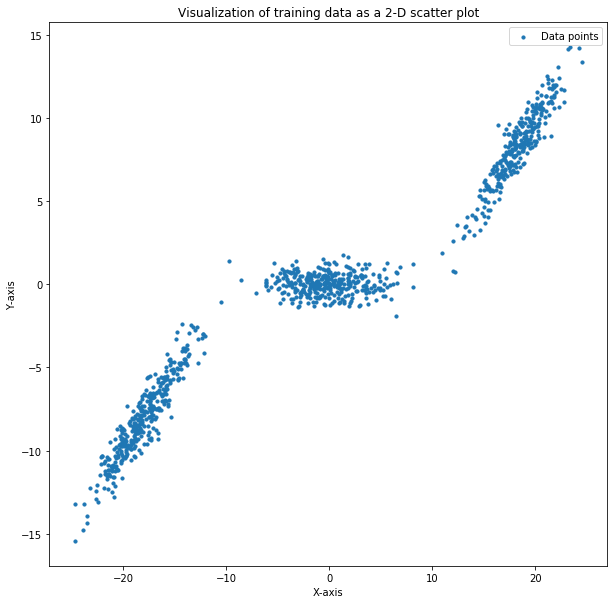

In [258]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(np.array(train_data)[:, 0], np.array(train_data)[:, 1], s = 10, label='Data points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Visualization of training data as a 2-D scatter plot')
ax.legend()
plt.show()

### Generating testing data:

In [259]:
test_l_1, test_l_2, test_l_3 = sample_number(N_2)

In [260]:
test_data = []

test_data_1 = np.add(np.matmul(np.matmul(np.array(covEvectors_1), np.sqrt(np.array(covEvalues))), np.random.randn(2, test_l_1)), np.array(meanVectors)[0, :].reshape((2, 1)))
test_data_2 = np.add(np.matmul(np.matmul(np.array(covEvectors_2), np.sqrt(np.array(covEvalues))), np.random.randn(2, test_l_2)), np.array(meanVectors)[1, :].reshape((2, 1)))
test_data_3 = np.add(np.matmul(np.matmul(np.array(covEvectors_3), np.sqrt(np.array(covEvalues))), np.random.randn(2, test_l_3)), np.array(meanVectors)[2, :].reshape((2, 1)))

for i in range(test_l_1):
    test_data.append(np.array(test_data_1)[:, i])
for i in range(test_l_2):
    test_data.append(np.array(test_data_2)[:, i])
for i in range(test_l_3):
    test_data.append(np.array(test_data_3)[:, i])

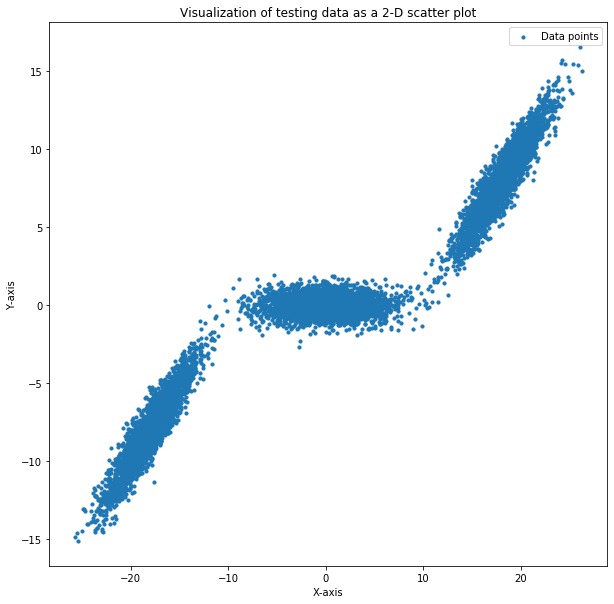

In [261]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(np.array(test_data)[:, 0], np.array(test_data)[:, 1], s = 10, label='Data points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Visualization of testing data as a 2-D scatter plot')
ax.legend()
plt.show()

### Selecting the optimal model using cross-validation:

#### Calculating optimal model order for Sigmoid activation

In [262]:
def baseline_model_1(M=0):
    model = Sequential()
    model.add(Dense(M, input_dim=1, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mse', optimizer='RMSprop', metrics = ['mse'])
    return model

In [263]:
X = np.array(train_data)[:, 0]
Y = np.array(train_data)[:, 1]
parameters = dict(M=M)
estimator = KerasRegressor(build_fn=baseline_model_1, epochs=1000, batch_size=N_1, verbose=0)
kfold = KFold(n_splits=10, shuffle = True)
gridsrch = GridSearchCV(estimator = estimator, param_grid = parameters, cv = kfold, n_jobs=-1)
result = gridsrch.fit(X, Y)
best_score_1 = -1*result.best_score_
best_param_1 = result.best_params_
mean_1 = np.multiply(-1, result.cv_results_['mean_test_score'])
param_1 = result.cv_results_['params']    

In [264]:
print("The best parameter for the sigmoid activation function is {} with a loss (mean squared error) of {}".format(best_param_1, best_score_1))

The best parameter for the sigmoid activation function is {'M': 24} with a loss (mean squared error) of 3.1476848125457764


In [265]:
for mean, param in zip(mean_1, param_1):
    print("%f with: %r" % (mean, param))

36.776821 with: {'M': 2}
28.176666 with: {'M': 4}
21.423724 with: {'M': 6}
16.645076 with: {'M': 8}
11.538482 with: {'M': 10}
9.025888 with: {'M': 12}
6.079369 with: {'M': 14}
4.925154 with: {'M': 16}
4.266614 with: {'M': 18}
3.624024 with: {'M': 20}
3.675913 with: {'M': 22}
3.147685 with: {'M': 24}


#### Calculating optimal model order for Softplus activation

In [266]:
def baseline_model_2(M=0):
    model = Sequential()
    model.add(Dense(M, input_dim=1, kernel_initializer='normal', activation='softplus'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics = ['mse'])
    return model

In [267]:
X = np.array(train_data)[:, 0]
Y = np.array(train_data)[:, 1]
parameters = dict(M=M)
estimator = KerasRegressor(build_fn=baseline_model_2, epochs=1000, batch_size=N_1, verbose=0)
kfold = KFold(n_splits=10, shuffle = True)
gridsrch = GridSearchCV(estimator = estimator, param_grid = parameters, cv = kfold, n_jobs=-1)
result = gridsrch.fit(X, Y)
best_score_2 = -1*result.best_score_
best_param_2 = result.best_params_
mean_2 = np.multiply(-1, result.cv_results_['mean_test_score'])
param_2 = result.cv_results_['params'] 

In [268]:
print("The best parameter for the softplus activation function is {} with a loss (mean squared error) of {}".format(best_param_2, best_score_2))

The best parameter for the softplus activation function is {'M': 24} with a loss (mean squared error) of 1.7073563635349274


In [269]:
for mean, param in zip(mean_2, param_2):
    print("%f with: %r" % (mean, param))

13.200888 with: {'M': 2}
7.285174 with: {'M': 4}
1.959078 with: {'M': 6}
1.879596 with: {'M': 8}
1.837582 with: {'M': 10}
1.797388 with: {'M': 12}
1.784011 with: {'M': 14}
1.760713 with: {'M': 16}
1.750147 with: {'M': 18}
1.727451 with: {'M': 20}
1.711531 with: {'M': 22}
1.707356 with: {'M': 24}


In [270]:
if abs(best_score_1) < abs(best_score_2):
    act = 'sigmoid'
    best_param = best_param_1.get('M')
else:
    act = 'softplus'
    best_param = best_param_2.get('M')

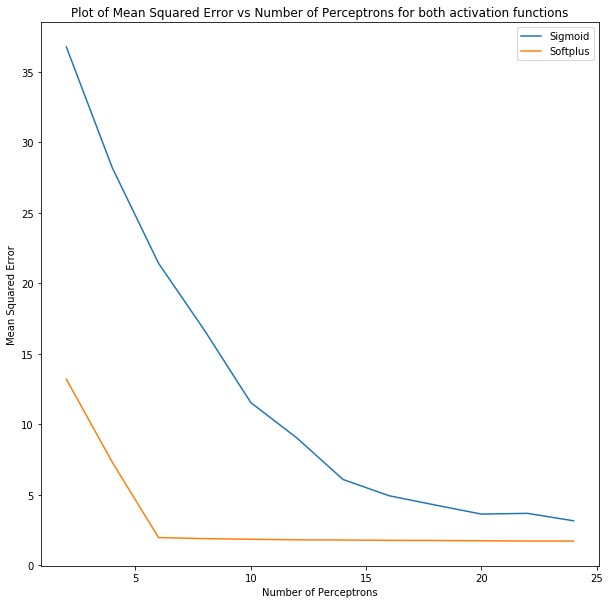

In [271]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(M, mean_1, label='Sigmoid')
ax.plot(M, mean_2, label='Softplus')
plt.xlabel('Number of Perceptrons')
plt.ylabel('Mean Squared Error')
plt.title('Plot of Mean Squared Error vs Number of Perceptrons for both activation functions')
ax.legend()
plt.show()

### Predicting the results for the optimal parameters

In [272]:
X_test = np.array(test_data)[:, 0]
Y_test = np.array(test_data)[:, 1]

In [273]:
model = Sequential()
model.add(Dense(best_param, input_dim=1, kernel_initializer='normal', activation=act))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mse', optimizer='RMSprop', metrics = ['mse'])
model.fit(X, Y, epochs=1000, batch_size=1000)
loss, accuracy = model.evaluate(X_test, Y_test)
predictions = model.predict(X_test)

Epoch 1/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 47.5638 - mean_squared_error: 47.5638
Epoch 2/1000
1000/1000 [==============================] - 0s 39us/step - loss: 46.9474 - mean_squared_error: 46.9474
Epoch 3/1000
1000/1000 [==============================] - 0s 8us/step - loss: 46.5012 - mean_squared_error: 46.5012
Epoch 4/1000
1000/1000 [==============================] - 0s 32us/step - loss: 46.1236 - mean_squared_error: 46.1236
Epoch 5/1000
1000/1000 [==============================] - 0s 9us/step - loss: 45.7844 - mean_squared_error: 45.7844
Epoch 6/1000
1000/1000 [==============================] - 0s 10us/step - loss: 45.4691 - mean_squared_error: 45.4691
Epoch 7/1000
1000/1000 [==============================] - 0s 37us/step - loss: 45.1707 - mean_squared_error: 45.1707
Epoch 8/1000
1000/1000 [==============================] - 0s 30us/step - loss: 44.8837 - mean_squared_error: 44.8837
Epoch 9/1000
1000/1000 [==============================] - 0s 22us/s

Epoch 71/1000
1000/1000 [==============================] - 0s 17us/step - loss: 24.8669 - mean_squared_error: 24.8669
Epoch 72/1000
1000/1000 [==============================] - 0s 10us/step - loss: 24.5033 - mean_squared_error: 24.5033
Epoch 73/1000
1000/1000 [==============================] - 0s 75us/step - loss: 24.1404 - mean_squared_error: 24.1404
Epoch 74/1000
1000/1000 [==============================] - 0s 15us/step - loss: 23.7780 - mean_squared_error: 23.7780
Epoch 75/1000
1000/1000 [==============================] - 0s 10us/step - loss: 23.4155 - mean_squared_error: 23.4155
Epoch 76/1000
1000/1000 [==============================] - 0s 15us/step - loss: 23.0543 - mean_squared_error: 23.0543
Epoch 77/1000
1000/1000 [==============================] - 0s 8us/step - loss: 22.6938 - mean_squared_error: 22.6938
Epoch 78/1000
1000/1000 [==============================] - 0s 7us/step - loss: 22.3343 - mean_squared_error: 22.3343
Epoch 79/1000
1000/1000 [==============================] -

Epoch 141/1000
1000/1000 [==============================] - 0s 3us/step - loss: 5.5433 - mean_squared_error: 5.5433
Epoch 142/1000
1000/1000 [==============================] - 0s 6us/step - loss: 5.4086 - mean_squared_error: 5.4086
Epoch 143/1000
1000/1000 [==============================] - 0s 6us/step - loss: 5.2778 - mean_squared_error: 5.2778
Epoch 144/1000
1000/1000 [==============================] - 0s 8us/step - loss: 5.1508 - mean_squared_error: 5.1508
Epoch 145/1000
1000/1000 [==============================] - 0s 11us/step - loss: 5.0274 - mean_squared_error: 5.0274
Epoch 146/1000
1000/1000 [==============================] - 0s 6us/step - loss: 4.9075 - mean_squared_error: 4.9075
Epoch 147/1000
1000/1000 [==============================] - 0s 8us/step - loss: 4.7910 - mean_squared_error: 4.7910
Epoch 148/1000
1000/1000 [==============================] - 0s 6us/step - loss: 4.6778 - mean_squared_error: 4.6778
Epoch 149/1000
1000/1000 [==============================] - 0s 8us/step

Epoch 212/1000
1000/1000 [==============================] - 0s 5us/step - loss: 2.1801 - mean_squared_error: 2.1801
Epoch 213/1000
1000/1000 [==============================] - 0s 6us/step - loss: 2.1796 - mean_squared_error: 2.1796
Epoch 214/1000
1000/1000 [==============================] - 0s 9us/step - loss: 2.1791 - mean_squared_error: 2.1791
Epoch 215/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.1786 - mean_squared_error: 2.1786
Epoch 216/1000
1000/1000 [==============================] - 0s 9us/step - loss: 2.1781 - mean_squared_error: 2.1781
Epoch 217/1000
1000/1000 [==============================] - 0s 5us/step - loss: 2.1776 - mean_squared_error: 2.1776
Epoch 218/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.1779 - mean_squared_error: 2.1779
Epoch 219/1000
1000/1000 [==============================] - 0s 5us/step - loss: 2.1808 - mean_squared_error: 2.1808
Epoch 220/1000
1000/1000 [==============================] - 0s 6us/ste

Epoch 283/1000
1000/1000 [==============================] - 0s 6us/step - loss: 2.1417 - mean_squared_error: 2.1417
Epoch 284/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.1411 - mean_squared_error: 2.1411
Epoch 285/1000
1000/1000 [==============================] - 0s 8us/step - loss: 2.1406 - mean_squared_error: 2.1406
Epoch 286/1000
1000/1000 [==============================] - 0s 7us/step - loss: 2.1401 - mean_squared_error: 2.1401
Epoch 287/1000
1000/1000 [==============================] - 0s 8us/step - loss: 2.1396 - mean_squared_error: 2.1396
Epoch 288/1000
1000/1000 [==============================] - 0s 6us/step - loss: 2.1392 - mean_squared_error: 2.1392
Epoch 289/1000
1000/1000 [==============================] - 0s 8us/step - loss: 2.1387 - mean_squared_error: 2.1387
Epoch 290/1000
1000/1000 [==============================] - 0s 6us/step - loss: 2.1383 - mean_squared_error: 2.1383
Epoch 291/1000
1000/1000 [==============================] - 0s 8us/step

Epoch 354/1000
1000/1000 [==============================] - 0s 5us/step - loss: 2.1011 - mean_squared_error: 2.1011
Epoch 355/1000
1000/1000 [==============================] - 0s 7us/step - loss: 2.1005 - mean_squared_error: 2.1005
Epoch 356/1000
1000/1000 [==============================] - 0s 13us/step - loss: 2.1000 - mean_squared_error: 2.1000
Epoch 357/1000
1000/1000 [==============================] - 0s 14us/step - loss: 2.0994 - mean_squared_error: 2.0994
Epoch 358/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.0988 - mean_squared_error: 2.0988
Epoch 359/1000
1000/1000 [==============================] - 0s 4us/step - loss: 2.0982 - mean_squared_error: 2.0982
Epoch 360/1000
1000/1000 [==============================] - 0s 11us/step - loss: 2.0977 - mean_squared_error: 2.0977
Epoch 361/1000
1000/1000 [==============================] - 0s 5us/step - loss: 2.0970 - mean_squared_error: 2.0970
Epoch 362/1000
1000/1000 [==============================] - 0s 10us/

Epoch 425/1000
1000/1000 [==============================] - 0s 11us/step - loss: 2.0593 - mean_squared_error: 2.0593
Epoch 426/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.0587 - mean_squared_error: 2.0587
Epoch 427/1000
1000/1000 [==============================] - 0s 2us/step - loss: 2.0581 - mean_squared_error: 2.0581
Epoch 428/1000
1000/1000 [==============================] - 0s 12us/step - loss: 2.0575 - mean_squared_error: 2.0575
Epoch 429/1000
1000/1000 [==============================] - 0s 4us/step - loss: 2.0569 - mean_squared_error: 2.0569
Epoch 430/1000
1000/1000 [==============================] - 0s 6us/step - loss: 2.0563 - mean_squared_error: 2.0563
Epoch 431/1000
1000/1000 [==============================] - 0s 6us/step - loss: 2.0557 - mean_squared_error: 2.0557
Epoch 432/1000
1000/1000 [==============================] - 0s 6us/step - loss: 2.0551 - mean_squared_error: 2.0551
Epoch 433/1000
1000/1000 [==============================] - 0s 6us/st

Epoch 496/1000
1000/1000 [==============================] - 0s 12us/step - loss: 2.0165 - mean_squared_error: 2.0165
Epoch 497/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.0158 - mean_squared_error: 2.0158
Epoch 498/1000
1000/1000 [==============================] - 0s 21us/step - loss: 2.0152 - mean_squared_error: 2.0152
Epoch 499/1000
1000/1000 [==============================] - 0s 17us/step - loss: 2.0146 - mean_squared_error: 2.0146
Epoch 500/1000
1000/1000 [==============================] - 0s 9us/step - loss: 2.0140 - mean_squared_error: 2.0140
Epoch 501/1000
1000/1000 [==============================] - 0s 9us/step - loss: 2.0134 - mean_squared_error: 2.0134
Epoch 502/1000
1000/1000 [==============================] - 0s 5us/step - loss: 2.0128 - mean_squared_error: 2.0128
Epoch 503/1000
1000/1000 [==============================] - 0s 10us/step - loss: 2.0121 - mean_squared_error: 2.0121
Epoch 504/1000
1000/1000 [==============================] - 0s 8us/

Epoch 567/1000
1000/1000 [==============================] - 0s 12us/step - loss: 1.9726 - mean_squared_error: 1.9726
Epoch 568/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.9720 - mean_squared_error: 1.9720
Epoch 569/1000
1000/1000 [==============================] - 0s 7us/step - loss: 1.9713 - mean_squared_error: 1.9713
Epoch 570/1000
1000/1000 [==============================] - 0s 14us/step - loss: 1.9707 - mean_squared_error: 1.9707
Epoch 571/1000
1000/1000 [==============================] - 0s 6us/step - loss: 1.9701 - mean_squared_error: 1.9701
Epoch 572/1000
1000/1000 [==============================] - 0s 9us/step - loss: 1.9695 - mean_squared_error: 1.9695
Epoch 573/1000
1000/1000 [==============================] - 0s 13us/step - loss: 1.9689 - mean_squared_error: 1.9689
Epoch 574/1000
1000/1000 [==============================] - 0s 9us/step - loss: 1.9683 - mean_squared_error: 1.9683
Epoch 575/1000
1000/1000 [==============================] - 0s 10us/

Epoch 638/1000
1000/1000 [==============================] - 0s 9us/step - loss: 1.9280 - mean_squared_error: 1.9280
Epoch 639/1000
1000/1000 [==============================] - 0s 8us/step - loss: 1.9273 - mean_squared_error: 1.9273
Epoch 640/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.9267 - mean_squared_error: 1.9267
Epoch 641/1000
1000/1000 [==============================] - 0s 7us/step - loss: 1.9261 - mean_squared_error: 1.9261
Epoch 642/1000
1000/1000 [==============================] - 0s 11us/step - loss: 1.9255 - mean_squared_error: 1.9255
Epoch 643/1000
1000/1000 [==============================] - 0s 8us/step - loss: 1.9248 - mean_squared_error: 1.9248
Epoch 644/1000
1000/1000 [==============================] - 0s 6us/step - loss: 1.9242 - mean_squared_error: 1.9242
Epoch 645/1000
1000/1000 [==============================] - 0s 8us/step - loss: 1.9236 - mean_squared_error: 1.9236
Epoch 646/1000
1000/1000 [==============================] - 0s 6us/ste

Epoch 709/1000
1000/1000 [==============================] - 0s 8us/step - loss: 1.8828 - mean_squared_error: 1.8828
Epoch 710/1000
1000/1000 [==============================] - 0s 6us/step - loss: 1.8821 - mean_squared_error: 1.8821
Epoch 711/1000
1000/1000 [==============================] - 0s 9us/step - loss: 1.8814 - mean_squared_error: 1.8814
Epoch 712/1000
1000/1000 [==============================] - 0s 6us/step - loss: 1.8808 - mean_squared_error: 1.8808
Epoch 713/1000
1000/1000 [==============================] - 0s 5us/step - loss: 1.8802 - mean_squared_error: 1.8802
Epoch 714/1000
1000/1000 [==============================] - 0s 15us/step - loss: 1.8796 - mean_squared_error: 1.8796
Epoch 715/1000
1000/1000 [==============================] - 0s 11us/step - loss: 1.8789 - mean_squared_error: 1.8789
Epoch 716/1000
1000/1000 [==============================] - 0s 5us/step - loss: 1.8783 - mean_squared_error: 1.8783
Epoch 717/1000
1000/1000 [==============================] - 0s 9us/ste

Epoch 780/1000
1000/1000 [==============================] - 0s 8us/step - loss: 1.8372 - mean_squared_error: 1.8372
Epoch 781/1000
1000/1000 [==============================] - 0s 6us/step - loss: 1.8365 - mean_squared_error: 1.8365
Epoch 782/1000
1000/1000 [==============================] - 0s 8us/step - loss: 1.8358 - mean_squared_error: 1.8358
Epoch 783/1000
1000/1000 [==============================] - 0s 5us/step - loss: 1.8352 - mean_squared_error: 1.8352
Epoch 784/1000
1000/1000 [==============================] - 0s 13us/step - loss: 1.8346 - mean_squared_error: 1.8346
Epoch 785/1000
1000/1000 [==============================] - 0s 6us/step - loss: 1.8339 - mean_squared_error: 1.8339
Epoch 786/1000
1000/1000 [==============================] - 0s 7us/step - loss: 1.8333 - mean_squared_error: 1.8333
Epoch 787/1000
1000/1000 [==============================] - 0s 6us/step - loss: 1.8327 - mean_squared_error: 1.8327
Epoch 788/1000
1000/1000 [==============================] - 0s 5us/step

Epoch 851/1000
1000/1000 [==============================] - 0s 11us/step - loss: 1.7914 - mean_squared_error: 1.7914
Epoch 852/1000
1000/1000 [==============================] - 0s 8us/step - loss: 1.7907 - mean_squared_error: 1.7907
Epoch 853/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.7900 - mean_squared_error: 1.7900
Epoch 854/1000
1000/1000 [==============================] - 0s 7us/step - loss: 1.7894 - mean_squared_error: 1.7894
Epoch 855/1000
1000/1000 [==============================] - 0s 7us/step - loss: 1.7887 - mean_squared_error: 1.7887
Epoch 856/1000
1000/1000 [==============================] - 0s 9us/step - loss: 1.7882 - mean_squared_error: 1.7882
Epoch 857/1000
1000/1000 [==============================] - 0s 7us/step - loss: 1.7875 - mean_squared_error: 1.7875
Epoch 858/1000
1000/1000 [==============================] - 0s 5us/step - loss: 1.7869 - mean_squared_error: 1.7869
Epoch 859/1000
1000/1000 [==============================] - 0s 5us/ste

Epoch 922/1000
1000/1000 [==============================] - 0s 9us/step - loss: 1.7456 - mean_squared_error: 1.7456
Epoch 923/1000
1000/1000 [==============================] - 0s 5us/step - loss: 1.7449 - mean_squared_error: 1.7449
Epoch 924/1000
1000/1000 [==============================] - 0s 9us/step - loss: 1.7443 - mean_squared_error: 1.7443
Epoch 925/1000
1000/1000 [==============================] - 0s 6us/step - loss: 1.7436 - mean_squared_error: 1.7436
Epoch 926/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.7430 - mean_squared_error: 1.7430
Epoch 927/1000
1000/1000 [==============================] - 0s 6us/step - loss: 1.7424 - mean_squared_error: 1.7424
Epoch 928/1000
1000/1000 [==============================] - 0s 8us/step - loss: 1.7418 - mean_squared_error: 1.7418
Epoch 929/1000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7411 - mean_squared_error: 1.7411
Epoch 930/1000
1000/1000 [==============================] - 0s 11us/ste

Epoch 993/1000
1000/1000 [==============================] - 0s 11us/step - loss: 1.7000 - mean_squared_error: 1.7000
Epoch 994/1000
1000/1000 [==============================] - 0s 8us/step - loss: 1.6993 - mean_squared_error: 1.6993
Epoch 995/1000
1000/1000 [==============================] - 0s 4us/step - loss: 1.6986 - mean_squared_error: 1.6986
Epoch 996/1000
1000/1000 [==============================] - 0s 19us/step - loss: 1.6980 - mean_squared_error: 1.6980
Epoch 997/1000
1000/1000 [==============================] - 0s 10us/step - loss: 1.6973 - mean_squared_error: 1.6973
Epoch 998/1000
1000/1000 [==============================] - 0s 6us/step - loss: 1.6967 - mean_squared_error: 1.6967
Epoch 999/1000
1000/1000 [==============================] - 0s 7us/step - loss: 1.6961 - mean_squared_error: 1.6961
Epoch 1000/1000
10000/10000 [==============================] - 1s 59us/step


In [274]:
print("The loss (mean squared error) obtained by applying the neural network on the test dataset is {}".format(loss))

The loss (mean squared error) obtained by applying the neural network on the test dataset is 1.7025480363845826


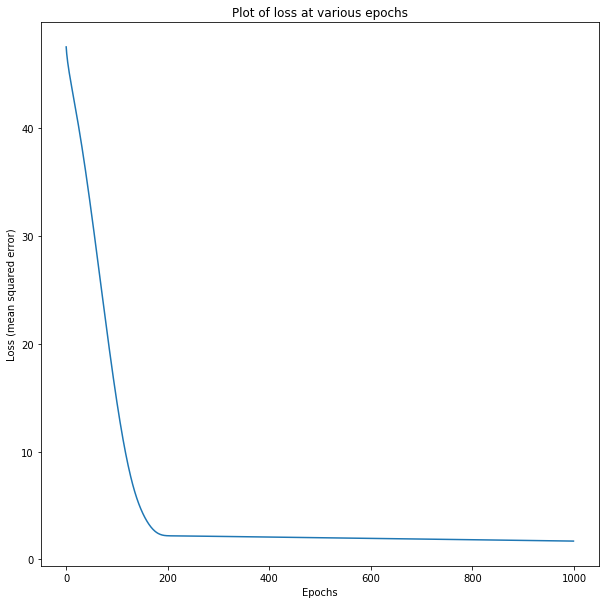

In [275]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
plt.plot(model.history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss (mean squared error)')
plt.title('Plot of loss at various epochs')
plt.show()

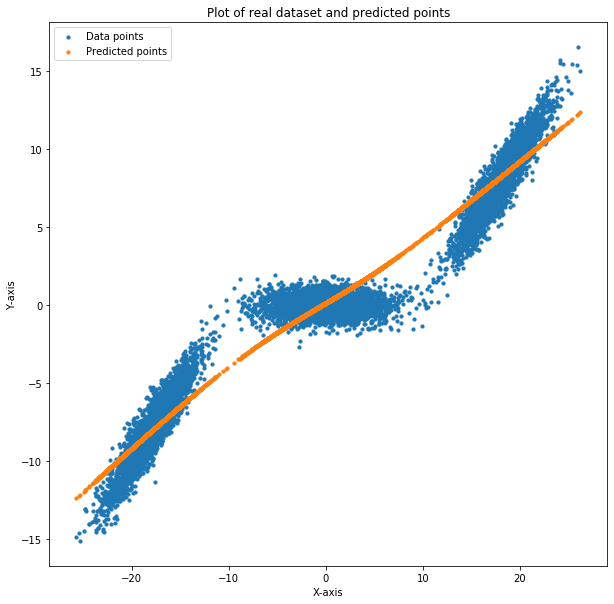

In [276]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(np.array(test_data)[:, 0], np.array(test_data)[:, 1], s = 10, label='Data points')
ax.scatter(X_test, predictions, s = 10, label = 'Predicted points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of real dataset and predicted points')
ax.legend()
plt.show()